## Grading Rubric
### Business Understanding (10 points total).

• Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

### Data Understanding (80 points total)
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.

• [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

• [15 points] Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

• [15 points] Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

• [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

• [5 points] Are there other features that could be added to the data or created from existing features? Which ones?
 
### Exceptional Work (10 points total)
• You have free reign to provide additional analyses.
• One idea: implement dimensionality reduction, then visualize and interpret the results.  

# Business Understanding

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [31]:
aviation_data = pd.read_csv("Data/AviationData.csv")
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'LOCATION', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Column Name 	Short Description 	Meaning 
EventId	Unique Identification for Each Event	Each event is assigned a unique 14-character alphanumeric code in the database. This code, used in conjunction with other primary keys (if applicable), are used to reference all database records. All database queries using a relational database (e.g., MS Access) should link tables using the ev_id variable.
InvestigationType	Type of Event	Refers to a regulatory definition of the event severity. The severity of a general aviation accident or incident is classified as the combination of the highest level of injury sustained by the personnel involved (that is, fatal, serious, minor, or none) and level of damage to the aircraft involved (that is, destroyed, substantial, minor, or none). The
AccidentNumber	NTSB Number	Each accident/incident is assigned a unique case number by the NTSB. This number is used as a reference in all documents referring to the event. The first 3 characters are a letter abbreviation of the NTSB office that filed the report. The next 2 numbers represent the fiscal year in which the accident occurred. The next two letters indicate the investigation category (Major, Limited, etc) and mode (Aviation, Marine, etc). The next three digits indicate the chronological sequence in which the case was created within the given fiscal year. And a final letter (A, B, C, etc) may exist if the event involved multiple aircraft
EventDate	Event Date	The date of the event. Dates are be entered in the format: MM/DD/YYYY
Location	Event Location Nearest City	The city or place location closest to the site of the event.
Country	Event Country	The country in which the event took place.
Latitude	Event Location Latitude	Latitude and longitude are entered for the event site in degrees and decimal degrees. If the event occurred on an airport, the published coordinates for that airport can be entered. If the event was not on an airport, position coordinates may be obtained usingGlobal Positioning System equipment or nearest known reading.
Longitude	Event Location Longitude	 
AirportCode	Event Location Nearest Airport ID	Airport code if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport.
AirportName	Event Location Airport	Airport name if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport.
InjurySeverity	Event Highest Injury	Indicate the highest level of injury among all injuries sustained as a result of the event.
AircraftDamage	Damage	Indicate the severity of damage to the accident aircraft. For the purposes of this variable, aircraft damage categories are defined in 49 CFR 830.2.
AircraftCategory	Aircraft Category	The category of the involved aircraft. In this case, the definition of aircraft category is the same as that used with respect to the certification, ratings, privileges, and limitations of airmen. Also note that there is some overlap of category and class in the available choices.
RegistrationNumber	Aircraft Registration Number	The full registration (tail) number of the involved aircraft, including the International Civil Aviation Organization (ICAO) country prefix. Note: the prefix for US registered aircraft is "N."
Make	Aircraft Manufacturer's Full Name	Name of the manufacturer of the involved aircraft.
Model	Aircraft Model	The full alphanumeric aircraft model code, including any applicable series or derivative identifiers. For example, a 200 series Boeing 737 is entered as 737-200.
AmateurBuilt	Aircraft is a homebuilt (Y/N).	 
NumberOfEngines	Number of Engines	The total number of engines on the accident aircraft.
EngineType	Engine Type	Type of engine(s) on the involved aircraft.
FARDescription	Federal Aviation Reg. Part	The applicable regulation part (14 CFR) or authority the aircraft was operating under at the time of the accident.
Schedule	Indicates whether an air carrier operation
was scheduled or not	If the accident aircraft was conducting air carrier operations under 14 CFR 121, 125, 129, or 135, indicate whether it was operating as a "scheduled or commuter" air carrier or as a "non-scheduled or air taxi" carrier.
PurposeOfFlight	Type of Flying (Per_Bus / Primary)	If the accident aircraft was operating under 14 CFR part 91,103,133, or 137, this was the primary purpose of flight.
AirCarrier	Operator Name& Operator Is Doing Business As	The full name of the operator of the accident aircraft. This typically refers to an organization or group (e.g., airline or corporation) rather than the pilot; contanated with the carrier, business, or code share name if the accident aircraft was operated by a business, air carrier, or as part of a code share agreement.
TotalFatalInjuries	Injury Total Fatal	The total number of fatal injuries from an event.
TotalSeriousInjuries	Injury Total Serious	The total number of serious injuries from an event.
TotalMinorInjuries	Injury Total Minor	The total number of minor injuries from an event.
TotalUninjured	Non-Injury Total	The total number of non-injuries from an event.
WeatherCondition	Basic weather conditions	The basic weather conditions at the time of the event.
BroadPhaseOfFlight	Phase of Flight	All occurrences include information about the phase of flight in which the occurrence took place. Phase of flight refers to the point in the aircraft operation profile in which the event occurred.
ReportStatus	Latest Report Level	The furthest level to which a report has been completed
PublicationDate	Publication data of the Latest Report Level	The date on which the previous column was published to the web.


In [32]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

In [33]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


# Data Meaning/Type

In [34]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


# Verify Data Quality

In [35]:
#splitting state and city from location
aviation_data['City'] = aviation_data['LOCATION'].str.split(',').str[0]
aviation_data['State'] = aviation_data['LOCATION'].str.split(',').str[1]
#dropping location since we now have state and city

In [36]:
#adding a total injuries column
#aviation_data['Total Injuries'] = aviation_data.apply(lambda row: row['Total.Fatal.Injuries' : 'Total.Minor.Injuries'].sum(),axis=1)
aviation_inj = pd.DataFrame(aviation_data['Total.Fatal.Injuries']+aviation_data['Total.Serious.Injuries']+aviation_data['Total.Minor.Injuries'])
aviation_inj = aviation_inj.rename(columns={0:"Total Injuries"})
aviation_merged = pd.concat([aviation_data,aviation_inj], axis=1)

In [37]:
aviation_merged.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total Injuries
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,0.0,0.0,0.0,VMC,NaN,NaN,NaN,JANESVILLE,WI,2.0
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,0.0,0.0,0.0,VMC,NaN,NaN,NaN,St Thomas,CB,4.0
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,TYONEK,AK,2.0
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,0.0,0.0,1.0,VMC,NaN,NaN,NaN,PRAIRIE DU SAC,WI,0.0
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,LAKE PLACID,FL,1.0


In [38]:
#We have 30 columns to work with
#First we will check to see what percent of each column is null

#Percent of missing data
percent_missing = aviation_merged.isnull().sum() * 100 / len(aviation_merged)
#Create DF 
missing_value_df = pd.DataFrame({'column_name': aviation_merged.columns,
                                 'percent_missing': percent_missing})
#Then sort by least to most
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Event.Id,Event.Id,0.000000
Accident.Number,Accident.Number,0.000000
Event.Date,Event.Date,0.000000
Investigation.Type,Investigation.Type,0.015120
Make,Make,0.079092
LOCATION,LOCATION,0.090723
City,City,0.090723
Model,Model,0.115148
Injury.Severity,Injury.Severity,0.155857
Country,Country,0.589699


What we can see from the missing data above is categories such as Air Carrier and schedule are missing the most. When prodicting with this dataset we will primarly forcus on total number of injuries and Injury severity. Something to consider with the missing data in air carrier is if there was a corrlation between air carrier and plane crashes I don't beleive that business would still be operating.

Regarding many of the missing values in the fields: Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries: we will be adding a total injuries column and consult outside sources to confirm these nulls as 0s. 

In [39]:
#dropping FAR.Descripiton, schedule, air.carrier due to a lack of data
#dropping location as it is redundant to city, state and country
#also dropping column named "text" I am not sure how that got into our df
aviation_merged.drop(['FAR.Description', 'Schedule','LOCATION','text'],axis=1)

KeyError: "['text'] not found in axis"

In [40]:
#checking for duplicates
#before we step into ourliars we would like to look for duplicates
#using the field acident number we will search for duplicates

print(aviation_merged[aviation_merged.duplicated(subset=['Accident.Number'])])


           Event.Id Investigation.Type Accident.Number  Event.Date  \
973  20200509X85739           Accident      ERA20CA175  2020-05-03   

        LOCATION        Country   Latitude  Longitude Airport.Code  \
973  SHIRLEY, NY  United States  40.828056 -72.865554          HWV   

    Airport.Name  ... Total.Serious.Injuries Total.Minor.Injuries  \
973   BROOKHAVEN  ...                    0.0                  0.0   

    Total.Uninjured Weather.Condition Broad.phase.of.flight Report.Status  \
973             1.0               VMC                   NaN           NaN   

    Publication.Date     City State Total Injuries  
973              NaN  SHIRLEY    NY            0.0  

[1 rows x 34 columns]


In [41]:
#Summary of the data for continious variables
#here we are looking for outliars and to see if median or mean can be used to fill in missing values
aviation_merged.describe().apply(lambda s: s.apply('{0:.1f}'.format))
print (aviation_merged.head)

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Injuries
count,31587.0,31578.0,80399.0,58158.0,55466.0,56695.0,71092.0,50712.0
mean,37.5,-2655.6,1.1,0.8,0.3,0.5,6.1,1.1
std,12.5,455322.7,0.4,6.3,1.4,2.9,30.2,5.1
min,-78.0,-80911844.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,33.3,-114.7,1.0,0.0,0.0,0.0,0.0,0.0
50%,38.1,-94.3,1.0,0.0,0.0,0.0,1.0,0.0
75%,42.5,-81.6,1.0,1.0,0.0,1.0,2.0,1.0
max,89.2,435.8,8.0,349.0,111.0,380.0,699.0,283.0


In [44]:
print (aviation_merged.head)

<bound method NDFrame.head of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0         2.02102E+13           Accident      CEN21FA130  2021-02-16   
1         2.02102E+13           Accident      ERA21FA130  2021-02-15   
2         2.02102E+13           Accident      ANC21LA017  2021-02-13   
3         2.02102E+13           Accident      CEN21LA127  2021-02-12   
4         2.02102E+13           Accident      ERA21LA131  2021-02-10   
...               ...                ...             ...         ...   
85971  20041105X01764           Accident      CHI79FA064  1979-08-02   
85972  20001218X45448           Accident      LAX96LA321  1977-06-19   
85973  20061025X01555           Accident      NYC07LA005  1974-08-30   
85974  20001218X45447           Accident      LAX94LA336  1962-07-19   
85975  20001218X45444           Accident      SEA87LA080  1948-10-24   

                 LOCATION        Country   Latitude   Longitude Airport.Code  \
0          JANESVILLE, WI

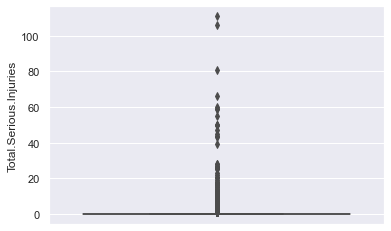

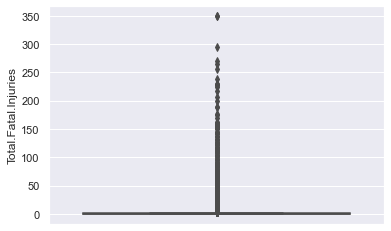

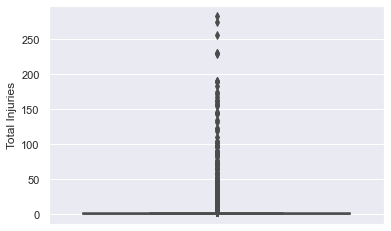

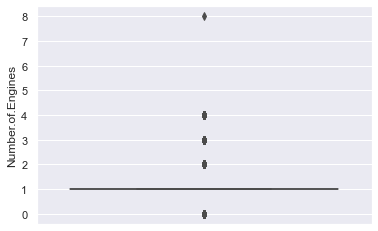

In [58]:
# making a  box plot to be able to see what  range of outliers that we might have 
# would  a box plot work in this case as there is  too  many scales in the varibles 
import seaborn as sns
import matplotlib.pyplot as plt

#df = sns.load_dataset(aviation_merged)
#df.head()

sns.boxplot( y=aviation_merged["Total.Serious.Injuries"] );
plt.show()

sns.boxplot( y=aviation_merged["Total.Fatal.Injuries"] );
plt.show()

sns.boxplot( y=aviation_merged["Total Injuries"] );
plt.show()

sns.boxplot( y=aviation_merged["Number.of.Engines"] );
plt.show()


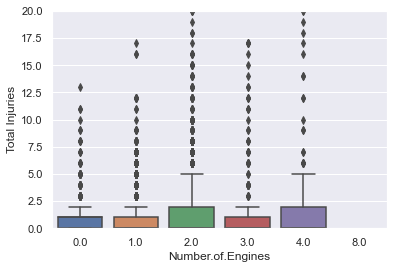

In [56]:
#Box plot for Each of the engine size
# might be good to limit the size of the axis 

sns.boxplot( x=aviation_merged["Number.of.Engines"], y=aviation_merged["Total Injuries"] );
plt.ylim(0, 20)
plt.show()

# Simple Statisitics

In [24]:
#looking at accidents by Country
aviation_country = aviation_merged['Country'].groupby(aviation_merged['Country']).count()
aviation_country


Country
Afghanistan       14
Albania            1
Algeria            5
American Samoa    10
Angola            11
                  ..
Vietnam            5
West Indies       11
Yemen              1
Zambia             2
Zimbabwe           4
Name: Country, Length: 185, dtype: int64

In [25]:
# Lets plot on a map where total injuries happened
aviation_merged['text'] = aviation_merged['Country'] + '<br>Total Injuries ' + (aviation_merged['Total Injuries'].astype(str))
colors = ["darkblue","yellow","seagreen","purple","cyan","orange"]
limits = [(0,50),(50,100),(100,150),(150,175),(175,200),(350,400)]
#scale = 10
accidentState = []

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    Injuries_Count = aviation_merged[((aviation_merged['Total Injuries'] > lim[0]) & (aviation_merged['Total Injuries'] <lim[1]))]
    fig.add_trace(go.Scattergeo(
        locationmode = 'country names',
        lon = Injuries_Count['Longitude'],
        lat = Injuries_Count['Latitude'],
        opacity = 0.8,
        text = Injuries_Count['text'],
        marker = dict(
            size = Injuries_Count['Total Injuries'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))
    accidentState.append(Injuries_Count)

fig.update_layout(
        title_text = 'Distribution of Total Injuries in the World<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

NameError: name 'go' is not defined